<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1:
- Nombre de alumno 2:


### **Link de repositorio de GitHub:** `http://....`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(4)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


## 2. Clasificación de pacientes con diabetes (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?. 

In [2]:
# Inserte su código aquí
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Carga de datos
df = pd.read_csv('diabetes_data.csv')

# Dividir los datos en características (features) y target
X = df.drop('Diabetes', axis=1)  # Características
y = df['Diabetes']  # Target

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento: creación del ColumnTransformer para escalar características numéricas
numeric_features = X.select_dtypes(include=[np.float64]).columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Creación del pipeline con preprocesamiento y modelo XGBoost
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

# Entrenamiento del modelo
pipeline.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

[[5012 2078]
 [1473 5576]]


El reporte de clasificación proporciona información sobre cómo el modelo está realizando las predicciones en términos de precisión, recall y F1-score para cada clase, así como la precisión global del modelo (accuracy).

- **Precision**: Representa la proporción de predicciones positivas correctas sobre el total de predicciones positivas realizadas por el modelo. Para la clase 0 (no diabetes), la precisión es del 77%, lo que significa que el 77% de las predicciones de no diabetes son correctas. Para la clase 1 (diabetes), la precisión es del 73%, lo que indica que el 73% de las predicciones de diabetes son correctas.

- **Recall**: Indica la proporción de instancias positivas que fueron correctamente identificadas por el modelo. Para la clase 0, el recall es del 71%, lo que significa que el modelo identifica correctamente el 71% de los casos reales de no diabetes. Para la clase 1, el recall es del 79%, indicando que el modelo identifica correctamente el 79% de los casos reales de diabetes.

- **F1-score**: Es una métrica que combina precisión y recall en una sola medida. El F1-score es del 74% para la clase 0 y del 76% para la clase 1.

- **Accuracy**: Representa la proporción de predicciones correctas en general. En este caso, el modelo tiene una precisión global del 75%, lo que significa que el 75% de las predicciones son correctas.

La matriz de confusión también muestra cómo el modelo está acertando o fallando en sus predicciones para cada clase. En este caso, se observa que el modelo tiene más falsos positivos (2078) que falsos negativos (1473) para la clase 0 (no diabetes), mientras que para la clase 1 (diabetes) tiene más falsos negativos (1473) que falsos positivos (2078).

En general, el modelo parece tener un desempeño aceptable, con métricas de precisión, recall y F1-score bastante equilibradas para ambas clases. Sin embargo, se puede buscar optimizar el modelo para mejorar aún más su capacidad predictiva o ajustar el equilibrio entre la precisión y el recall dependiendo de las necesidades específicas de la aplicación.

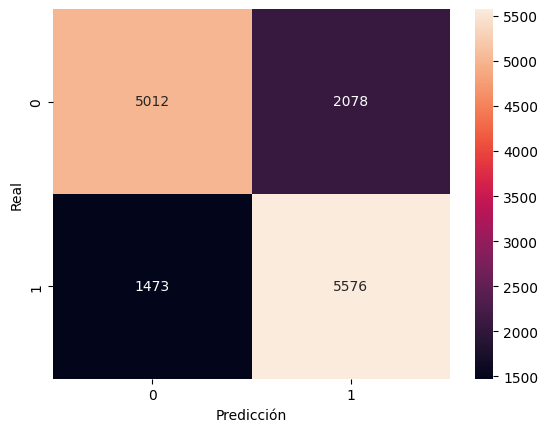

In [3]:
# creamos matriz de confusion usando matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

## 3. Importancia de las features con XGBoost (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

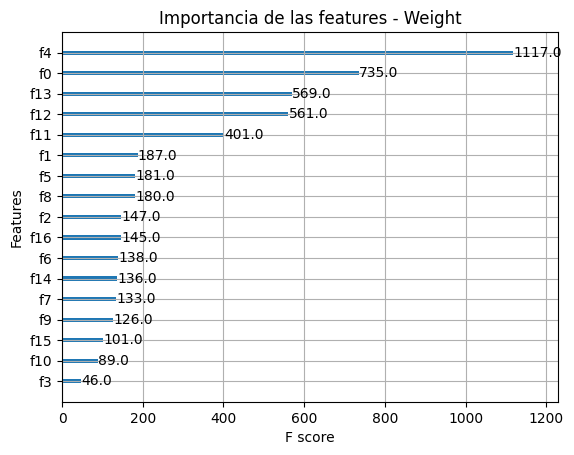

In [4]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Obtener la importancia de las features
plot_importance(pipeline.named_steps['classifier'], importance_type='weight')
plt.title('Importancia de las features - Weight')
plt.show()

**Importancia de las features - Weight**: Esta métrica indica cuántas veces una característica aparece en los árboles del modelo. Aquí vemos que las características `f4`, `f13`, `f12` y `f0` tienen los valores más altos, lo que sugiere que estas características son consideradas más importantes en términos de frecuencia de aparición en los árboles.

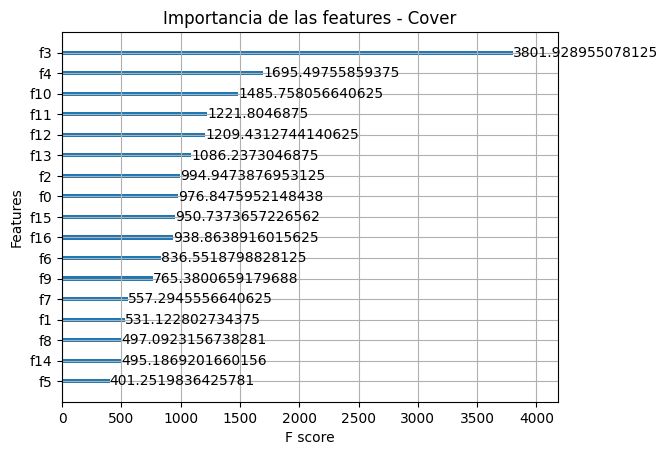

In [5]:
plot_importance(pipeline.named_steps['classifier'], importance_type='cover')
plt.title('Importancia de las features - Cover')
plt.show()

**Importancia de las features - Cover**: Esta métrica muestra la cantidad de datos afectados por la inclusión de una característica en los árboles. Aquí, `f3` tiene un valor alto, seguido por `f10`, lo que implica que estas características afectan a una gran cantidad de datos en los árboles.

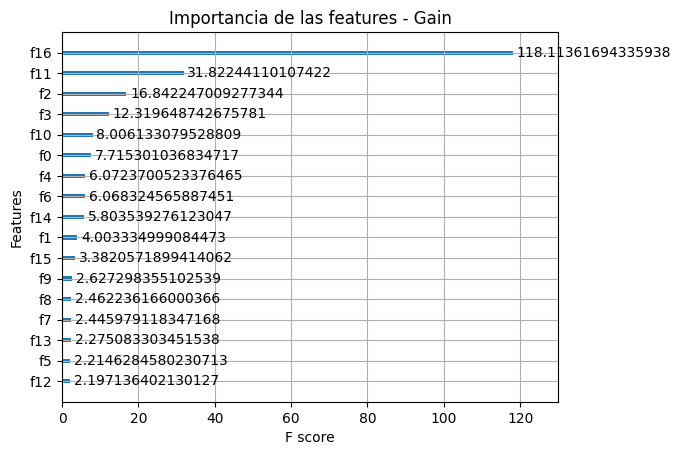

In [6]:
plot_importance(pipeline.named_steps['classifier'], importance_type='gain')
plt.title('Importancia de las features - Gain')
plt.show()

**Importancia de las features - Gain**: Esta métrica mide la ganancia promedio de las características al ser utilizadas en los árboles del modelo. `f16`, `f11` y `f2` tienen los valores más altos, lo que sugiere que estas características contribuyen significativamente a la reducción del criterio de división (ganancia) en los árboles.

La discrepancia entre los métodos puede ocurrir debido a las diferentes formas en que cada métrica evalúa la importancia de las características. `Weight` se centra en la frecuencia de aparición, `Cover` considera la cantidad de datos afectados y `Gain` evalúa la contribución de la característica en la reducción del criterio de división. Aunque estas métricas proporcionan información valiosa, no capturan interacciones entre características o su impacto conjunto en las predicciones, lo que podría limitar la interpretación completa del modelo. 

## 4. Métodos Agnósticos Globales (1.0 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

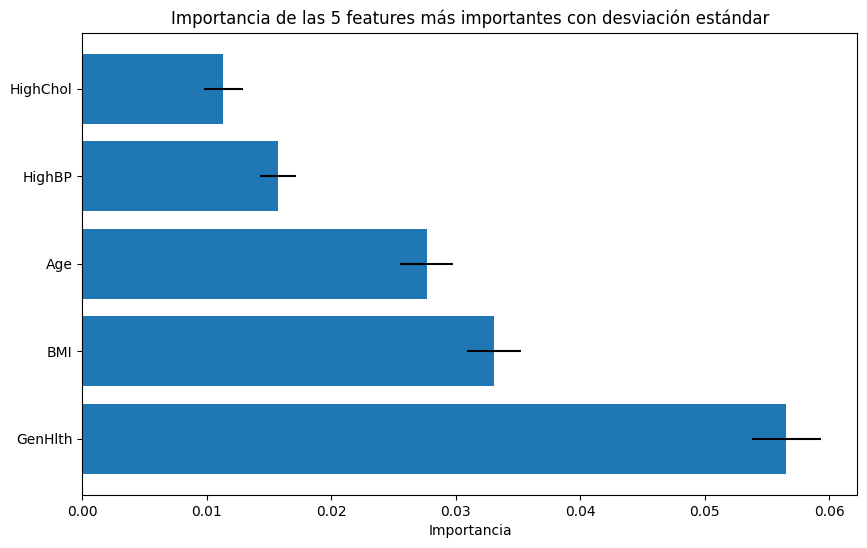

In [7]:
# Inserte su código aquí
from sklearn.inspection import permutation_importance

# Entrenar el modelo inicial
pipeline.fit(X_train, y_train)

# Calcular la importancia de las features con el método de permutación
perm_importance = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=42)

# Obtener la importancia promedio y desviación estándar
mean_importance = perm_importance.importances_mean
std_importance = perm_importance.importances_std

# Graficar la importancia de las features
sorted_idx = np.argsort(mean_importance)[::-1]  # Índices ordenados por importancia
features = X_test.columns[sorted_idx]
plt.figure(figsize=(10, 6))
plt.barh(features[:5], mean_importance[sorted_idx][:5], xerr=std_importance[sorted_idx][:5], align='center')
plt.xlabel('Importancia')
plt.title('Importancia de las 5 features más importantes con desviación estándar')
plt.show()




**¿Cómo mide la importancia de las features su propuesta?**

El método de permutación evalúa la importancia de las características al medir cómo su perturbación aleatoria afecta el rendimiento del modelo. Calcula la disminución en la métrica de evaluación (por ejemplo, precisión, exactitud) cuando se permuta cada característica. Las características que, al ser permutadas, causan una mayor reducción en el rendimiento del modelo se consideran más importantes, ya que su información es crítica para las predicciones.

**¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?**

Las 5 características más importantes obtenidas son:
1. **GenHlth (General Health)**: Esta variable refleja la salud general y tiene un impacto significativo en la predicción del modelo. Tiene sentido, ya que la salud general puede influir en la probabilidad de desarrollar diabetes.
2. **BMI (Body Mass Index)**: El índice de masa corporal es un factor crucial en la diabetes. Su alta importancia está en línea con la relación bien documentada entre la obesidad y esta enfermedad.
3. **Age (Edad)**: La edad es un factor de riesgo común para la diabetes, especialmente para la diabetes tipo 2. Es coherente que aparezca entre las características más importantes.
4. **HighBP (High Blood Pressure)**: La presión arterial alta es un factor de riesgo conocido para la diabetes, por lo que su importancia alta tiene sentido.
5. **HighChol (High Cholesterol)**: El colesterol alto puede contribuir al desarrollo de la diabetes, por lo que su influencia en las predicciones también es lógica.

**¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?**

Las conclusiones se alinean en gran medida con las importancias obtenidas previamente. Sin embargo, el método de permutación ofrece una visión más robusta y agnóstica, considerando las interacciones entre las características y su impacto real en la capacidad predictiva del modelo.

**Ventajas**:
1. **Robustez**: Es un método agnóstico que no depende del tipo específico de modelo, por lo que es aplicable a una amplia gama de algoritmos de aprendizaje automático.
2. **Evaluación directa**: Evalúa directamente el impacto de cada característica en el rendimiento del modelo, proporcionando una medida precisa de su importancia.
3. **Estimación de confianza**: Calcula la desviación estándar de las importancias, lo que permite evaluar la estabilidad y confiabilidad de las evaluaciones.

**Desventajas**:
1. **Costoso computacionalmente**: Al permutar características múltiples veces, puede ser computacionalmente costoso, especialmente en conjuntos de datos grandes.
2. **Dependencia del tamaño de muestra**: En conjuntos de datos pequeños, las estimaciones pueden ser menos precisas.
3. **Interpretación limitada**: Aunque muestra la importancia relativa de las características, no revela relaciones causales ni interacciones entre las mismas.

## 5. Métodos Agnósticos Locales (2.0 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### 5.1 Calculando Shap Values (0.4 puntos)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [8]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
[20:14:00] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


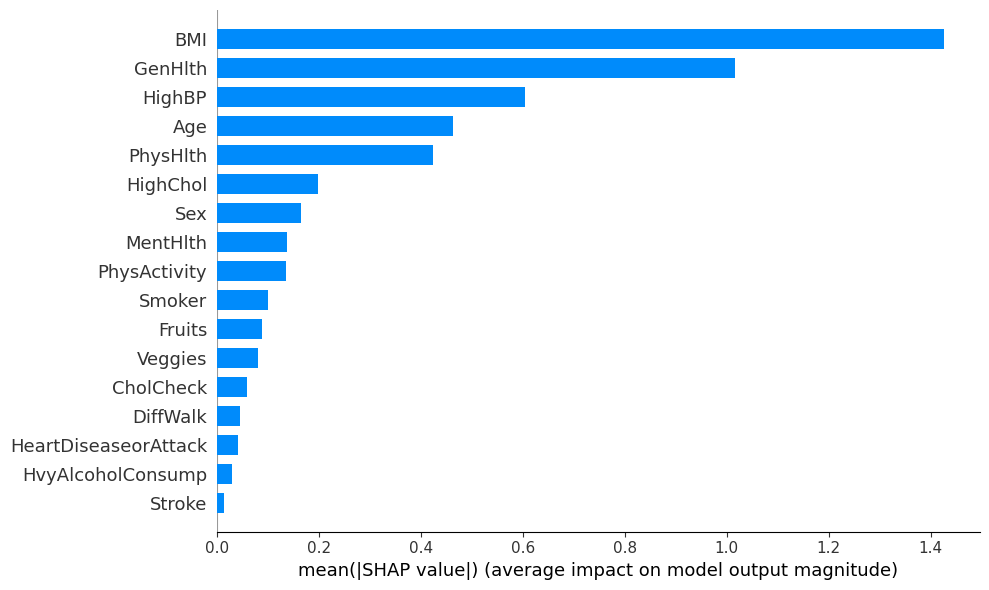

In [9]:
# Inserte código para calcular shapley values aquí
import shap

# Crear el explainer con el conjunto de entrenamiento
explainer = shap.TreeExplainer(pipeline.named_steps['classifier'])

# Calcular los shapley values con el conjunto de prueba
shap_values = explainer.shap_values(X_test)

# Graficar los shapley values
shap.summary_plot(shap_values, X_test, plot_type='bar', plot_size=(10, 6))
plt.show()

# Generamos un diccionario con la variable y su respectivo shapley value
shap_dict = dict(zip(X_test.columns, shap_values[1]))


Los valores de los SHAP (SHapley Additive exPlanations) representan la contribución de cada característica a la predicción del modelo para un caso individual en comparación con la predicción promedio del modelo.

Cada número en los SHAP values indica cómo esa característica específica influye en la predicción del modelo para un caso particular. La positividad o negatividad de cada valor se interpreta en relación con su efecto en la predicción:

**Valores positivos**: Indican que la presencia o el valor alto de esa característica contribuye a aumentar la predicción del modelo para ese caso en particular en comparación con la predicción promedio.
**Valores negativos**: Sugieren que la ausencia o un valor bajo de esa característica contribuye a disminuir la predicción del modelo para ese caso específico en comparación con la predicción promedio.

- Por ejemplo, para la característica "BMI" con un valor de 1.983562, un valor alto de índice de masa corporal (BMI) contribuiría significativamente a aumentar la predicción del modelo para ese caso en particular.
- En contraste, para "HighBP" con un valor de -0.5499322, una presión arterial alta (High Blood Pressure) parece disminuir la predicción del modelo para ese caso específico en comparación con la predicción promedio.

Estos valores muestran cómo cada característica individualmente afecta las predicciones del modelo para un caso particular, permitiendo una interpretación detallada de su impacto en las predicciones.

### 5.2 Aporte local (0.4 puntos)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? 
- ¿Existe algún patrón común entre las instancias analizadas? 
- ¿Es posible generalizar estas conclusiones a todo el dataset?

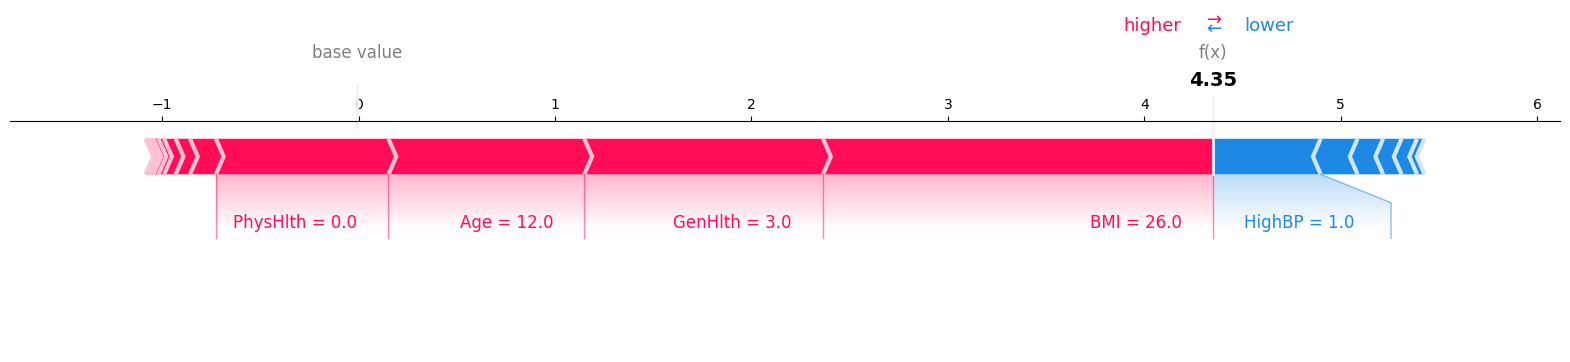

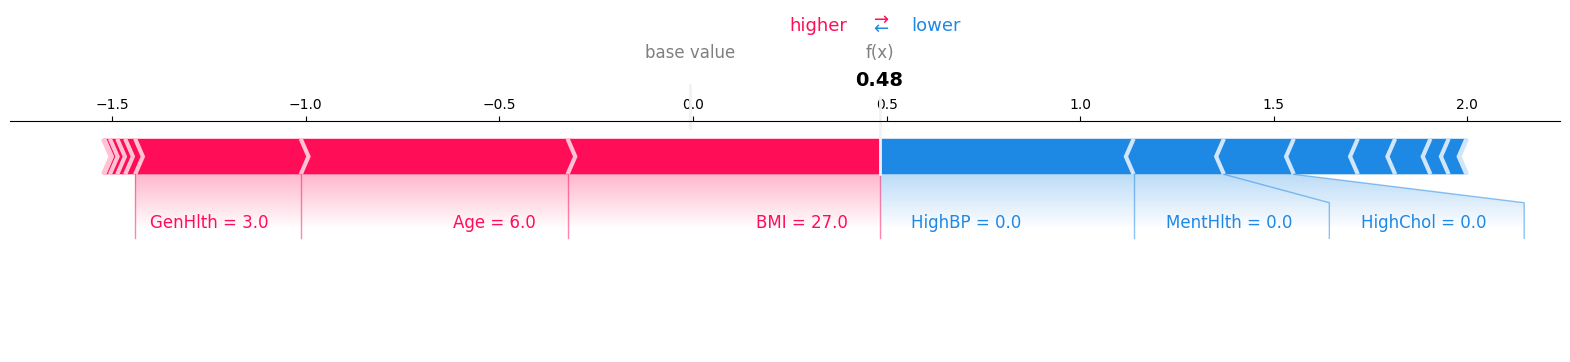

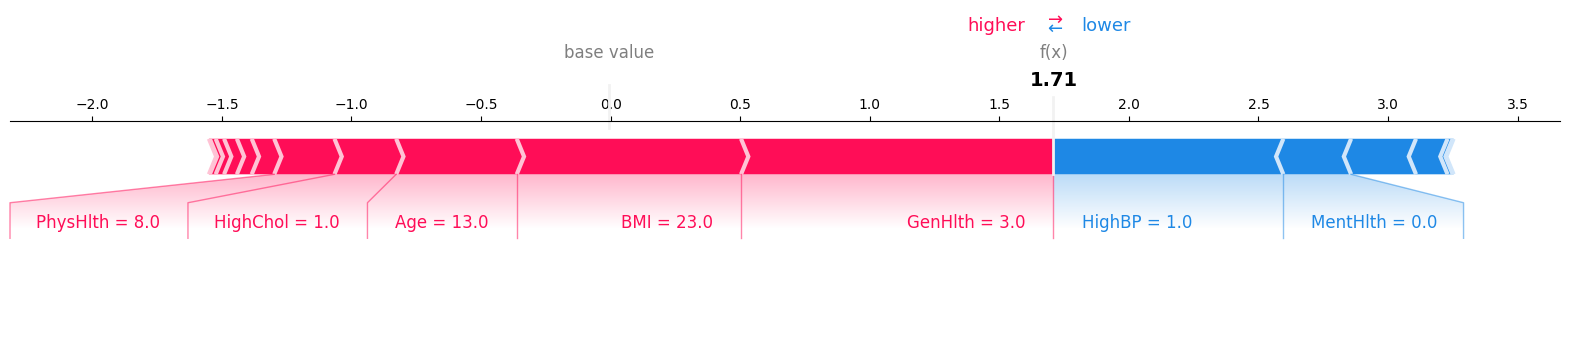

In [10]:
shap.initjs()
shap_values_df = pd.DataFrame(shap_values, columns=df.drop('Diabetes', axis=1).columns)

# Obtener el aporte de las diferentes variables para las instancias 1, 9 y 150
instances = [1, 9, 150]

for instance in instances:
    shap.force_plot(explainer.expected_value, shap_values[instance], df.drop('Diabetes', axis=1).iloc[instance], matplotlib=True)


### 5.3 Aporte global (0.4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

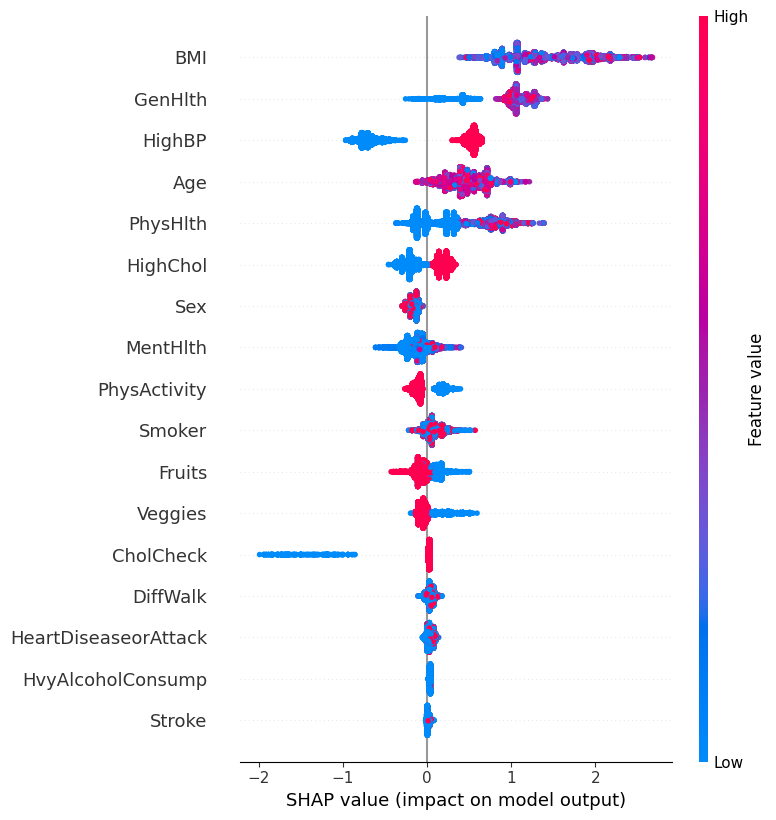

In [18]:
# Inserte código para generar gráficos de aporte global aquí
shap.summary_plot(shap_values, X_test)


### 5.4 Scatter plot (0.4 puntos)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

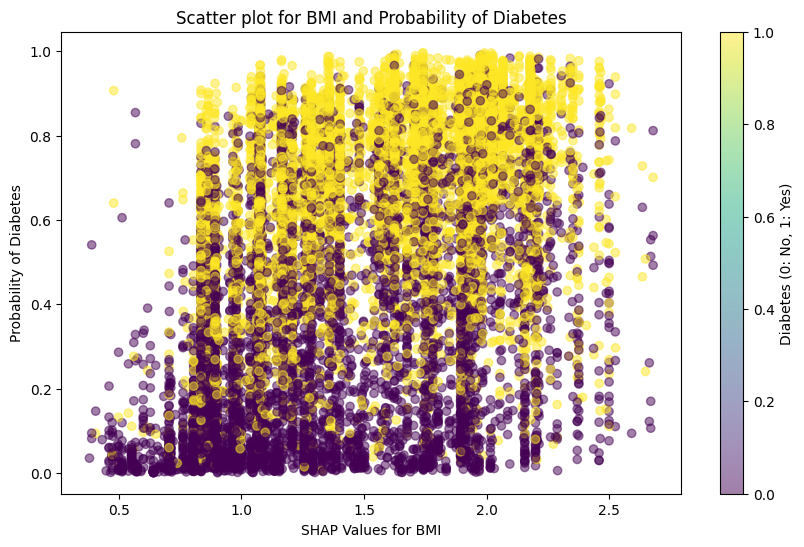

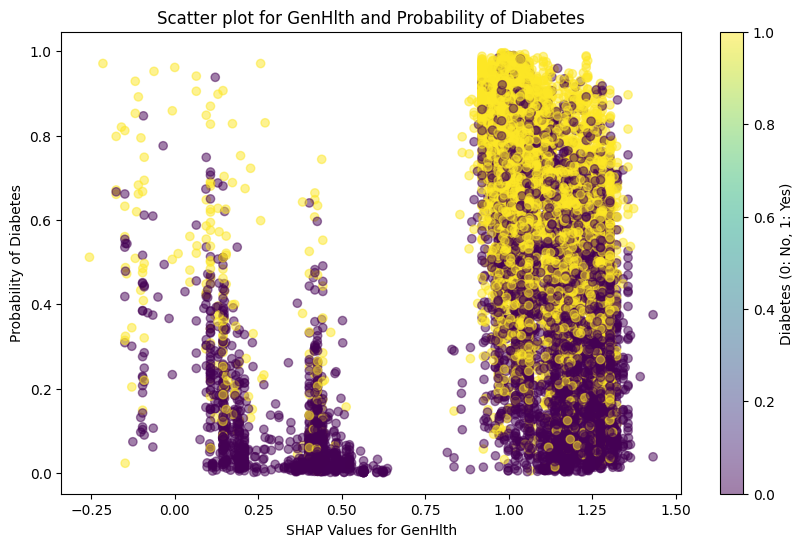

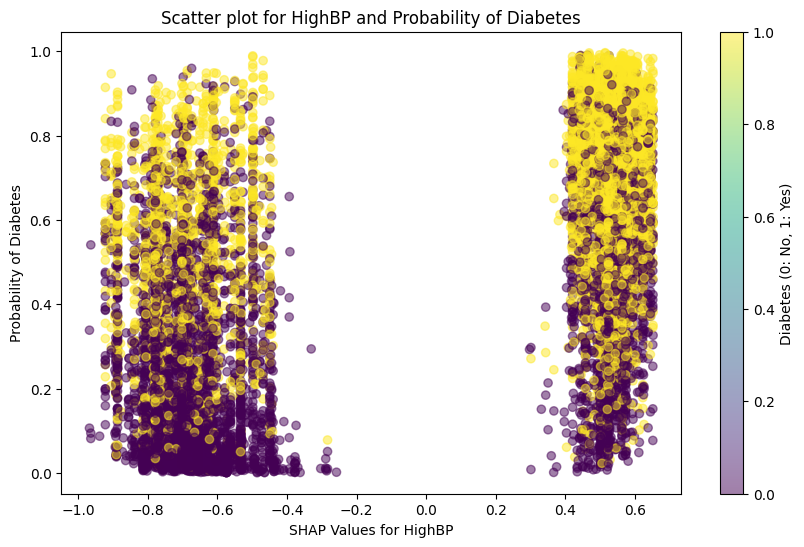

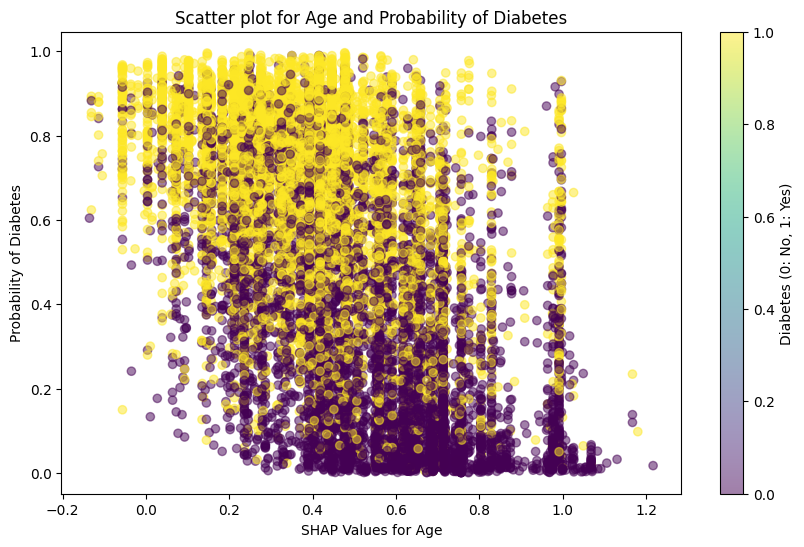

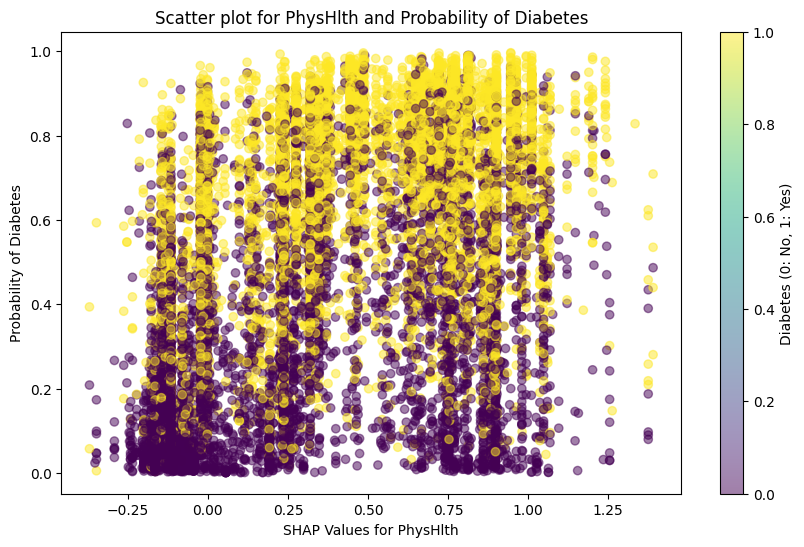

In [25]:
# Inserte código para generar gráficos de feature vs shap value aquí
import matplotlib.pyplot as plt

# Calcular el impacto global de cada característica
summary_vals = np.abs(shap_values).mean(axis=0)

# Seleccionar las 5 características con mayor impacto
top_features = summary_vals.argsort()[::-1][:5]

# Crear los scatter plots para cada una de las 5 características
for feature in top_features:
    plt.figure(figsize=(10, 6))

    # Scatter plot entre los valores SHAP y la probabilidad de tener diabetes, con puntos de tamaño proporcional al valor SHAP
    plt.scatter(shap_values[:, feature], pipeline.predict_proba(X_test)[:, 1], c=y_test, cmap=None, alpha=0.5)

    # Configuración del gráfico
    plt.xlabel(f'SHAP Values for {X_test.columns[feature]}')
    plt.ylabel('Probability of Diabetes')
    plt.title(f'Scatter plot for {X_test.columns[feature]} and Probability of Diabetes')
    plt.colorbar(label='Diabetes (0: No, 1: Yes)')
    plt.show()


Este código generará 5 gráficos de dispersión, uno para cada una de las 5 características con mayor impacto global, mostrando la relación entre los valores SHAP y la probabilidad de tener diabetes.

Estos gráficos te permitirán observar visualmente cómo varían los valores SHAP en relación con la probabilidad de tener diabetes para las características más influyentes en las predicciones del modelo.

### 5.5 Partial Dependence Plot (0.4 puntos)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

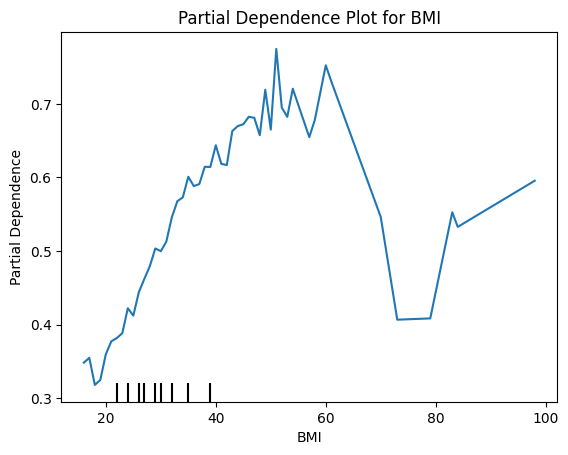

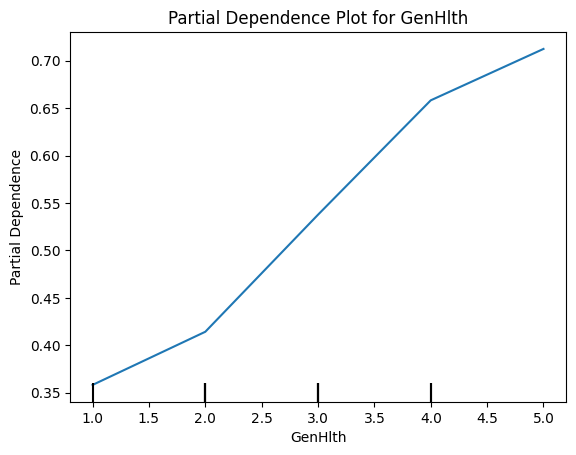

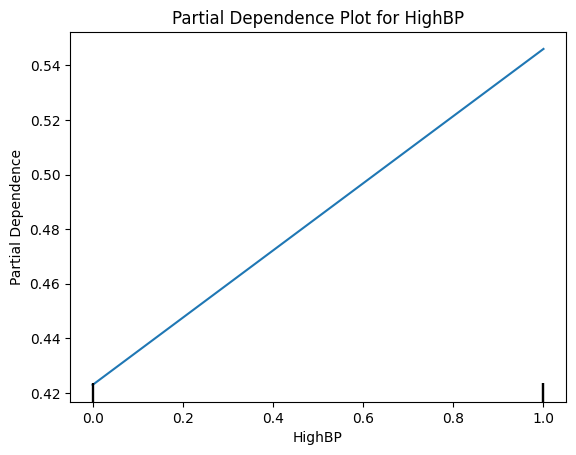

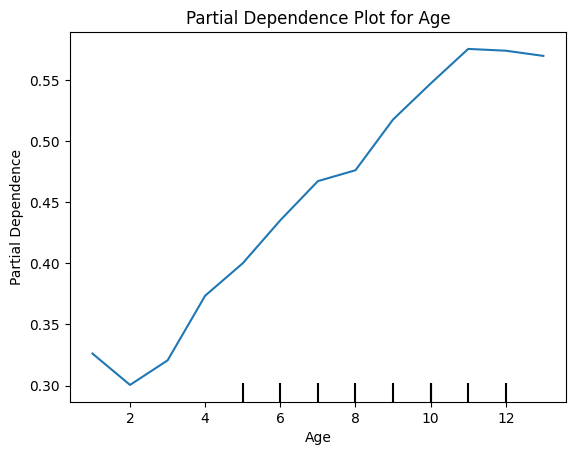

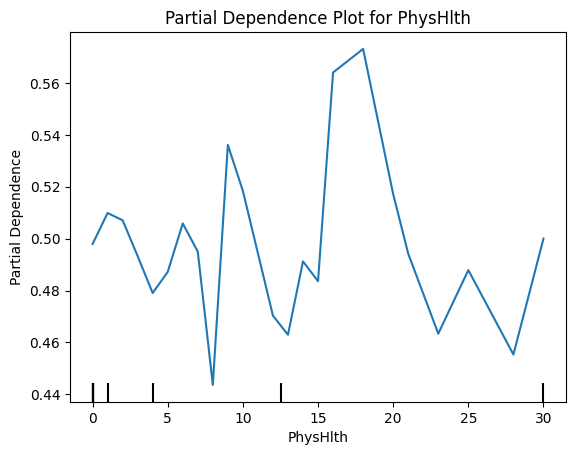

In [13]:
from sklearn.inspection import PartialDependenceDisplay

# Seleccionar las 5 características con mayor impacto global
top_features = summary_vals.argsort()[::-1][:5]

# Crear un subconjunto de 1000 observaciones del conjunto de datos
X_subsample = X_test.sample(n=1000, random_state=42)

# Generar los gráficos PDP para las 5 variables seleccionadas
for feature in top_features:
    pd_plot = PartialDependenceDisplay.from_estimator(pipeline, X_subsample, [feature])
    pd_plot.plot(ax=plt.gca())
    plt.xlabel(X_test.columns[feature])
    plt.ylabel('Partial Dependence')
    plt.title(f'Partial Dependence Plot for {X_test.columns[feature]}')
    plt.show()


## 6. Sistema de Reglas! (1.0 puntos)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [26]:
!pip install alibi


In [27]:
from alibi.explainers import AnchorTabular

ImportError: Attempted to use DistributedExplainer without the correct optional dependencies installed. This may be due to missing or incompatible versions of dependencies. To install the correct optional dependencies, run `pip install alibi[ray]` from the command line. For more information, check the installationdocumentation at https://docs.seldon.io/projects/alibi/en/latest/overview/getting_started.html.

In [ ]:
# Inserte su código para generar sistema de reglas aquí

idx = 1000
# explicar predicción idx 1000

idx = 3001
# explicar predicción idx 3001

idx = 5751
# explicar predicción idx 5751

# Retrospectiva... (1.0 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>